# 딥러닝과 퍼셉트론 실습

### 실습1. 다층 퍼셉트론 구현

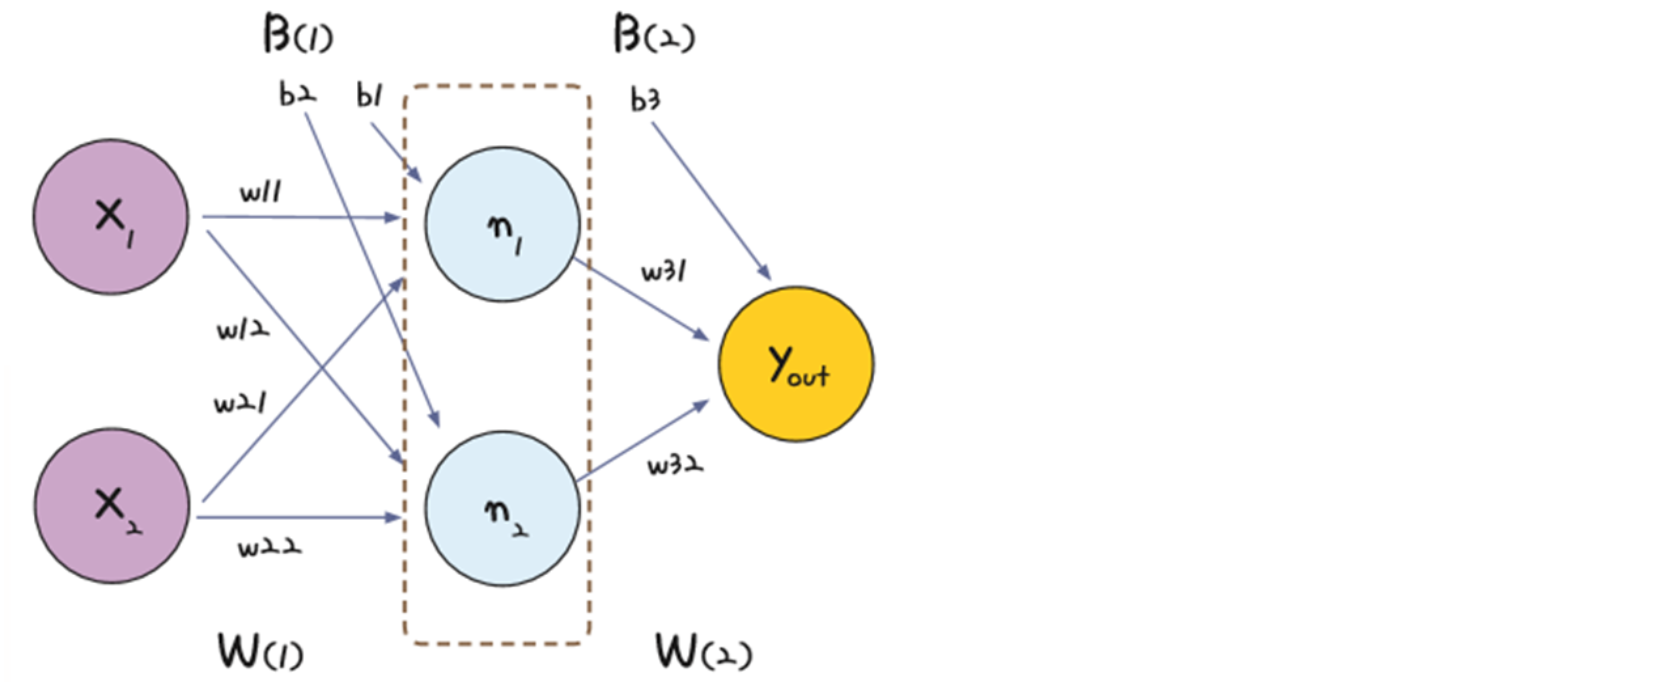

**XOR 문제 해결**

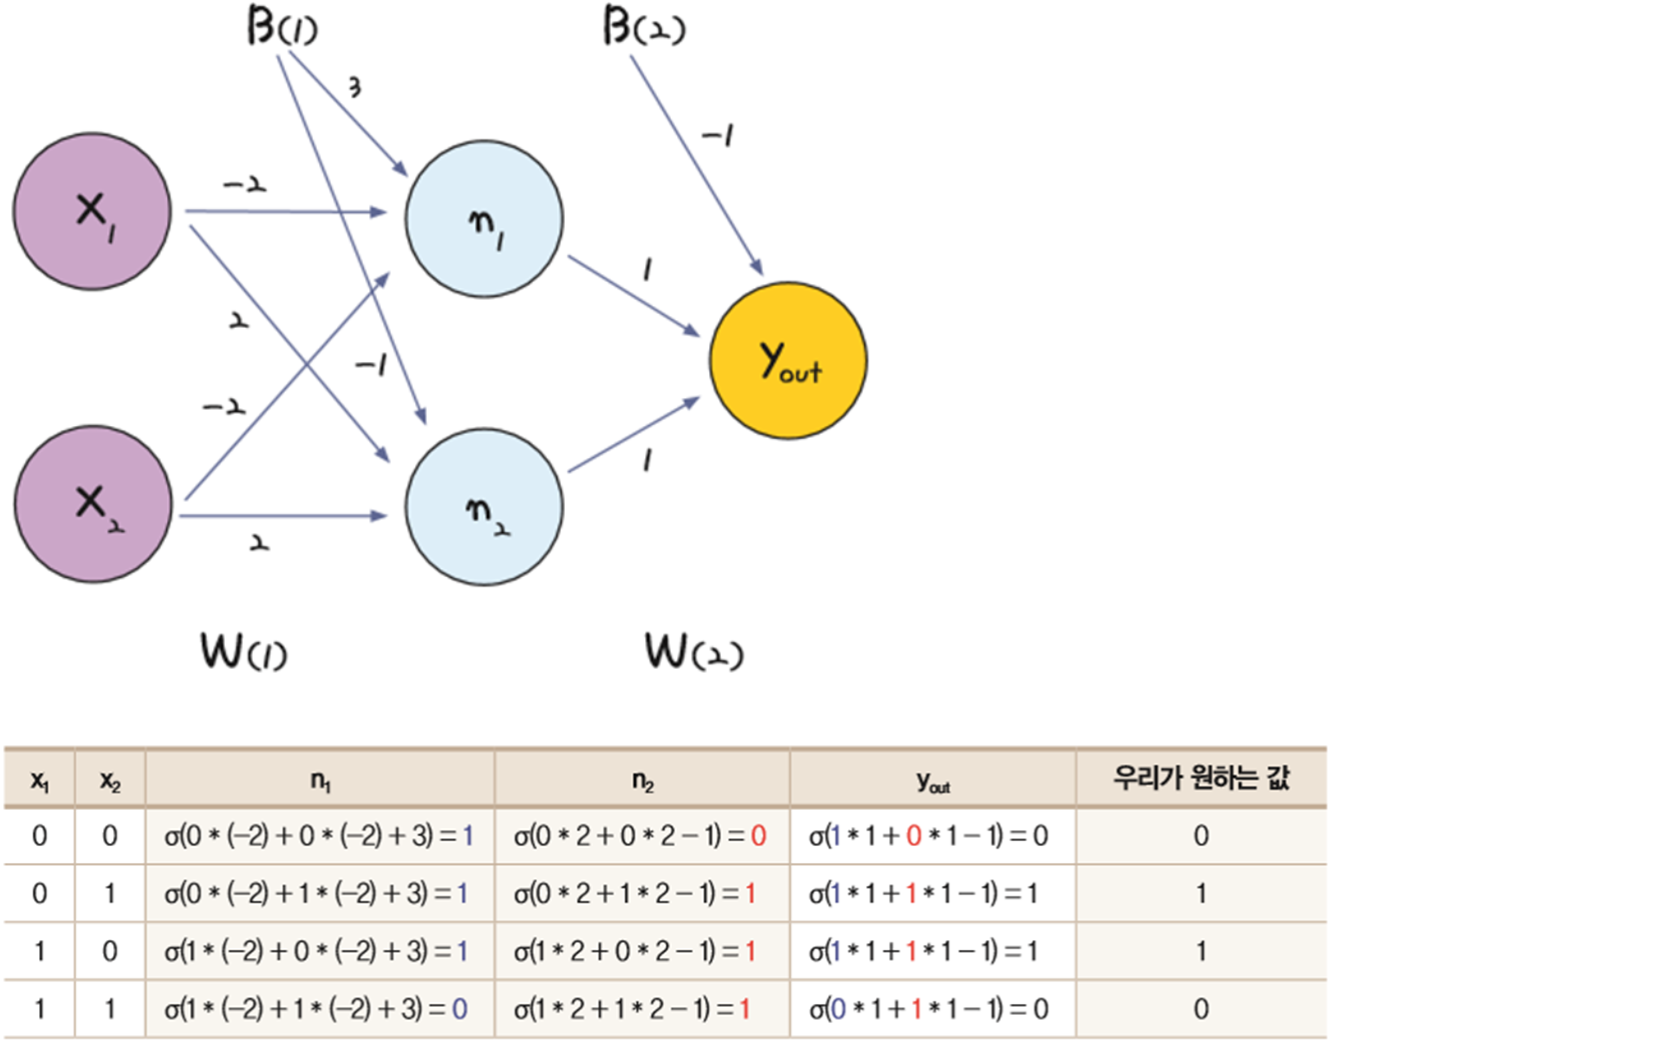

In [1]:
import numpy as np

#### weight와 bias 초기화

In [2]:
w11 = np.array([-2,-2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1, b2, b3 = 3, -1, -1

#### 다층 퍼셉트론 MLP() 정의

In [6]:
def MLP(x, w, b): #multi layer perceptron
    y = np.sum(w * x) + b
    if y <=0:
        return 0
    else:
        return 1

#### 다양한 문제 처리 게이트 정의
- and, or, xor 등

In [4]:
def NAND(x1, x2):
    X = np.array([x1, x2])
    return MLP(X, w11, b1)

def OR(x1, x2):
    X = np.array([x1, x2])
    return MLP(X, w12, b2)
    
def AND(x1, x2):
    X = np.array([x1, x2])
    return MLP(X, w2, b3)
    
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

#### 연산 수행

In [7]:
X = [[0,0],[0,1],[1,0],[1,1]]

print('## XOR 연산 ##')
for x in X:
    y = XOR(x[0], x[1])
    print(f'입력값:{x}, 출력값:{y}')
print()

## XOR 연산 ##
입력값:[0, 0], 출력값:0
입력값:[0, 1], 출력값:1
입력값:[1, 0], 출력값:1
입력값:[1, 1], 출력값:0



In [8]:
print('## AND 연산 ##')
for x in X:
    y = AND(x[0], x[1])
    print(f'입력값:{x}, 출력값:{y}')
print()

## AND 연산 ##
입력값:[0, 0], 출력값:0
입력값:[0, 1], 출력값:0
입력값:[1, 0], 출력값:0
입력값:[1, 1], 출력값:1



In [10]:
print('## OR 연산 ##')
for x in X:
    y = OR(x[0], x[1])
    print(f'입력값:{x}, 출력값:{y}')
print()

## OR 연산 ##
입력값:[0, 0], 출력값:0
입력값:[0, 1], 출력값:1
입력값:[1, 0], 출력값:1
입력값:[1, 1], 출력값:1



In [11]:
print('## NAND 연산 ##')
for x in X:
    y = NAND(x[0], x[1])
    print(f'입력값:{x}, 출력값:{y}')
print()

## NAND 연산 ##
입력값:[0, 0], 출력값:1
입력값:[0, 1], 출력값:1
입력값:[1, 0], 출력값:1
입력값:[1, 1], 출력값:0



----

### 실습2. 오차 역전파(Backpropagation)

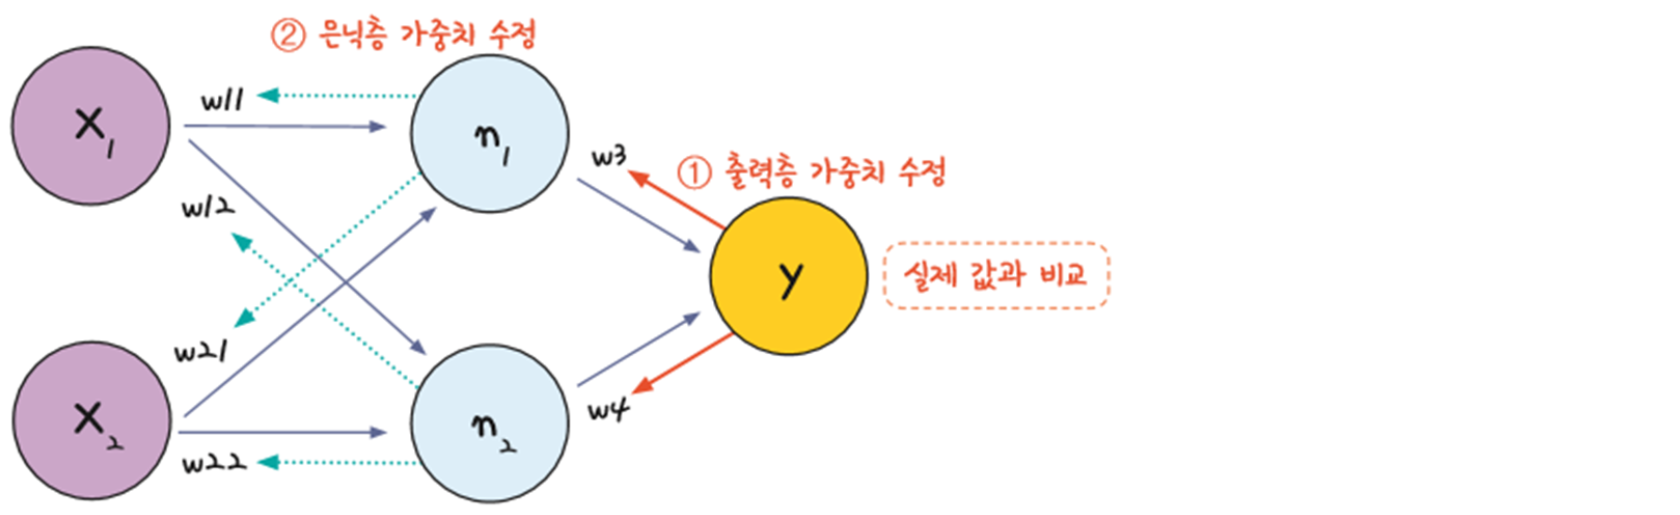

**최적화의 계산 방향이 출력층에서 앞의 층으로 진행 = 오차 역전파(back propagation)**

**오차 역전파 동작 단계**
1. 임의의 초기 가중치(w(1))를 준 뒤 결과(y_out)를 계산 
2. 계산 결과(예측값)와 원하는 값(실제값,타깃값) 사이의 오차 계산 
3. 경사 하강법을 이용해 바로 앞 가중치를 **오차가 작아지는 방향으로 업데이트**

**오차가 작아지는 방향으로 업데이트 한다**

- 미분 값이 0에 가까워지는 방향으로 나간다
- 기울기가 0이 되는 방향

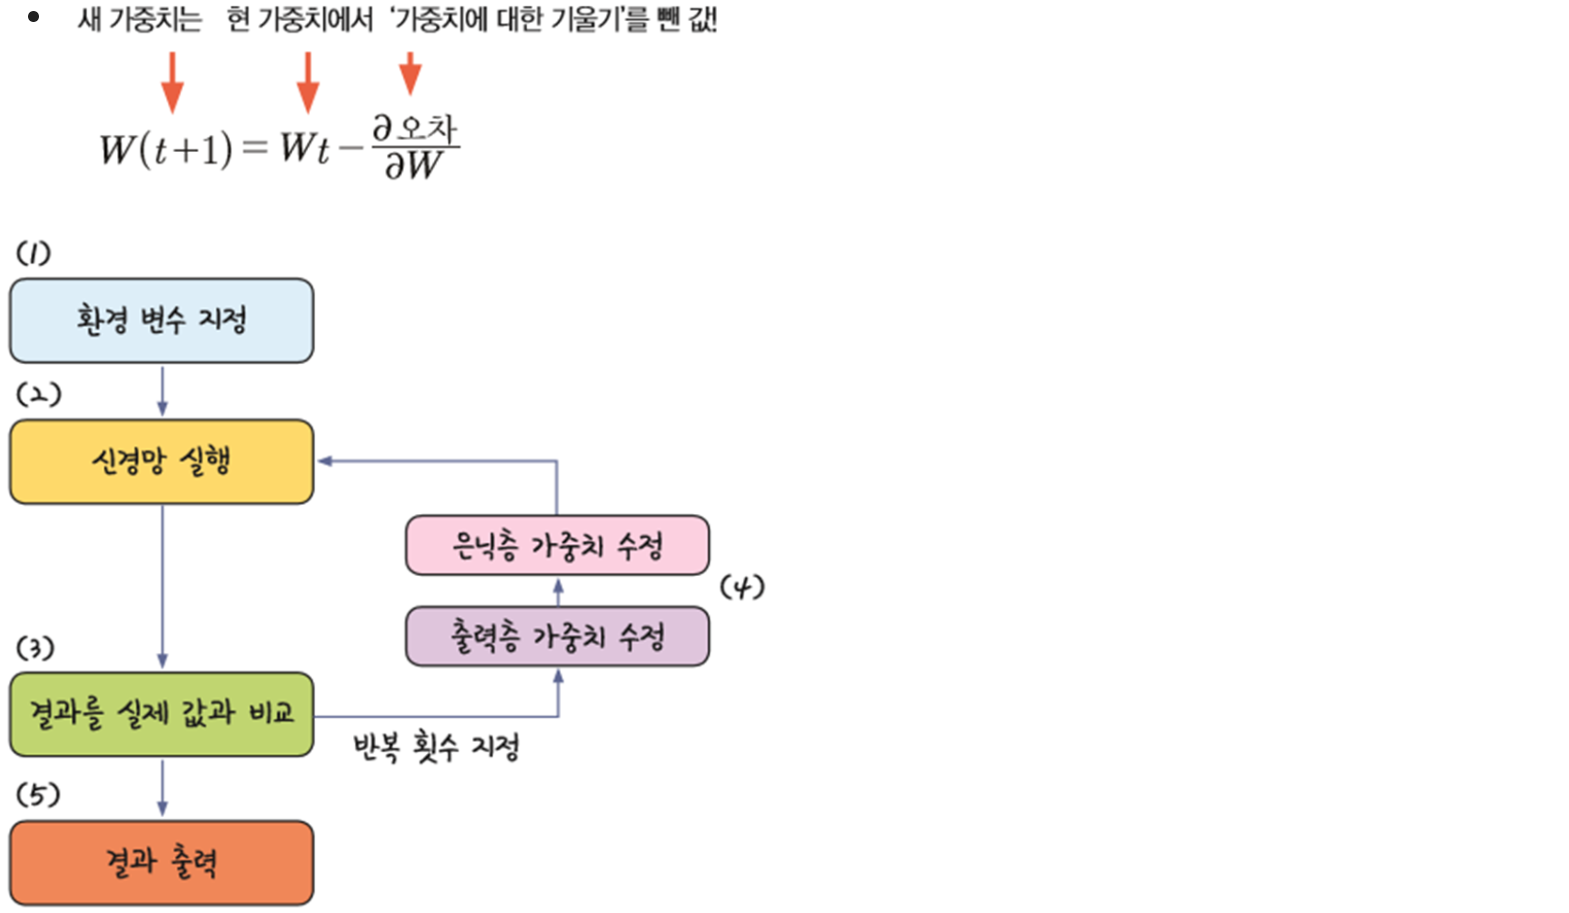

- 신경망 클래스 구현

In [31]:
import random

random.seed(777)

class NeuralNetwork:
    def __init__(self, num_x, num_yh, num_yo, bias=1):
        #입력값(x), 은닉층초기값(yh), 출력층초기값(yo), 바이어스(b)
        self.num_x = num_x + bias
        self.num_yh = num_yh
        self.num_yo = num_yo
        
        #활성화 함수 초기값
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo
        
        #가중치 입력 초기값
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()
        
        #가중치 출력 초기값
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()
                
        #모멘텀 SGD를 위한 이전 가중치 초기값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo) 
    
    def update(self, inputs):
        # 입력층의 활성화 함수
        for i in range(self.num_x - 1):
            self.activation_input[i] = inputs[i]

        # 은닉층의 활성화 함수
        for j in range(self.num_yh):
            sum = 0.0
            for i in range(self.num_x):
                sum += self.activation_input[i] * self.weight_in[i][j]
            self.activation_hidden[j] = tanh(sum, False)

        # 출력층의 활성화 함수
        for k in range(self.num_yo):
            sum = 0.0
            for j in range(self.num_yh):
                sum += self.activation_hidden[j] * self.weight_out[j][k]
            self.activation_out[k] = tanh(sum, False)

        return self.activation_out[:]
    
    def backPropagate(self, targets):
        #델타 출력 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            output_deltas[k] = tanh(self.activation_out[k], True) * error
            
        #은닉 노드의 오차 함수
        hidden_deltas = [0.0] * self.num_yh
        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k]
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error
            
        #출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient
        
        #입력 가중치 업데이트
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo * self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient
                
        #오차 계산 (최소제곱법)
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k])**2
        
        return error
    
    def train(self, patterns):
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 500 == 0:
                print(f'{i} => error: {error:.5f}')
        
    def result(self, patterns):
        for p in patterns:
            print(f'Input:{p[0]}, Predict:{self.update(p[0])}')

- 활성화함수 정의

In [16]:
def tanh(x, derivative=False):
    if derivative == True:
        return 1 - x**2
    return np.tanh(x)

def sigmoid(x, derivative=False):
    if derivative == True:
        return x*(1-x)
    return 1 / (1 + np.exp(-x))

In [19]:
sigmoid(10) #양의 값을 넣으면 1에 가깝고

0.9999546021312976

In [20]:
sigmoid(-10) #음수의 값은 거의 0에 가깝게 나옴

4.5397868702434395e-05

In [21]:
tanh(0)

0.0

In [23]:
np.tanh(0)

0.0

In [22]:
sigmoid(0)

0.5

- 가중치 배열 만드는 함수 정의

In [17]:
def makeMatrix(i, j, fill=0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j)
    return mat

In [18]:
makeMatrix(2,3) #2행 3열을 만들어줌

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

- 데이터셋 준비(X, y), 학습률(learning rate), 활성화함수 가중치 등 선언

In [32]:
# 1. 데이터 준비: X, y
data = [[[0,0],[0]],
        [[0,1],[1]],
        [[1,0],[1]],
        [[1,1],[0]]]

# 2. 학습을 위한 파라미터 설정
iterations = 5000
lr = 0.1
mo = 0.4 #모멘텀

# 3. 학습과 결과 출력
nn = NeuralNetwork(num_x=2, num_yh=2, num_yo=1) #input, hiddenlayer, output
nn.train(data)
nn.result(data)

0 => error: 0.66537
500 => error: 0.00263
1000 => error: 0.00088
1500 => error: 0.00051
2000 => error: 0.00036
2500 => error: 0.00027
3000 => error: 0.00022
3500 => error: 0.00018
4000 => error: 0.00016
4500 => error: 0.00014
Input:[0, 0], Predict:[0.0006183430577834696]
Input:[0, 1], Predict:[0.9889696478602483]
Input:[1, 0], Predict:[0.9889970505963888]
Input:[1, 1], Predict:[0.002144925237974706]


-----